In [1]:
# Import relevant packages for visual part of understanding crossing locations on the map
import pandas as pd
import xlrd
from matplotlib import pyplot as plt

In [2]:
# Getting crossings data for check up which of them are relevant
crossings_data = pd.read_excel('Sankryzos_koordinatės.xlsx')
# Check data (latitudes are y, longitutes are x)
crossings_data.head()

,Node,x,y
0,K1001 Rinktinės-Kazliškių,25.286866,54.698668
1,K1002 Žirmūnų pėsc. ties IKI,25.300914,54.697964
2,K1003 Olandų - Filaretų,25.308601,54.685154
3,K1004 Subačiaus g.(pesčiųjų perėja),25.301221,54.677212
4,K1005 Zarasų - Paplaujos,25.311172,54.678638


In [3]:
# Defining limits for map coordinates (map limits) using openstreetmap.org
map_limits = (25.2292, 25.2913, 54.6878, 54.7226)

In [4]:
# Loading map for the area
area_map = plt.imread('map.png')

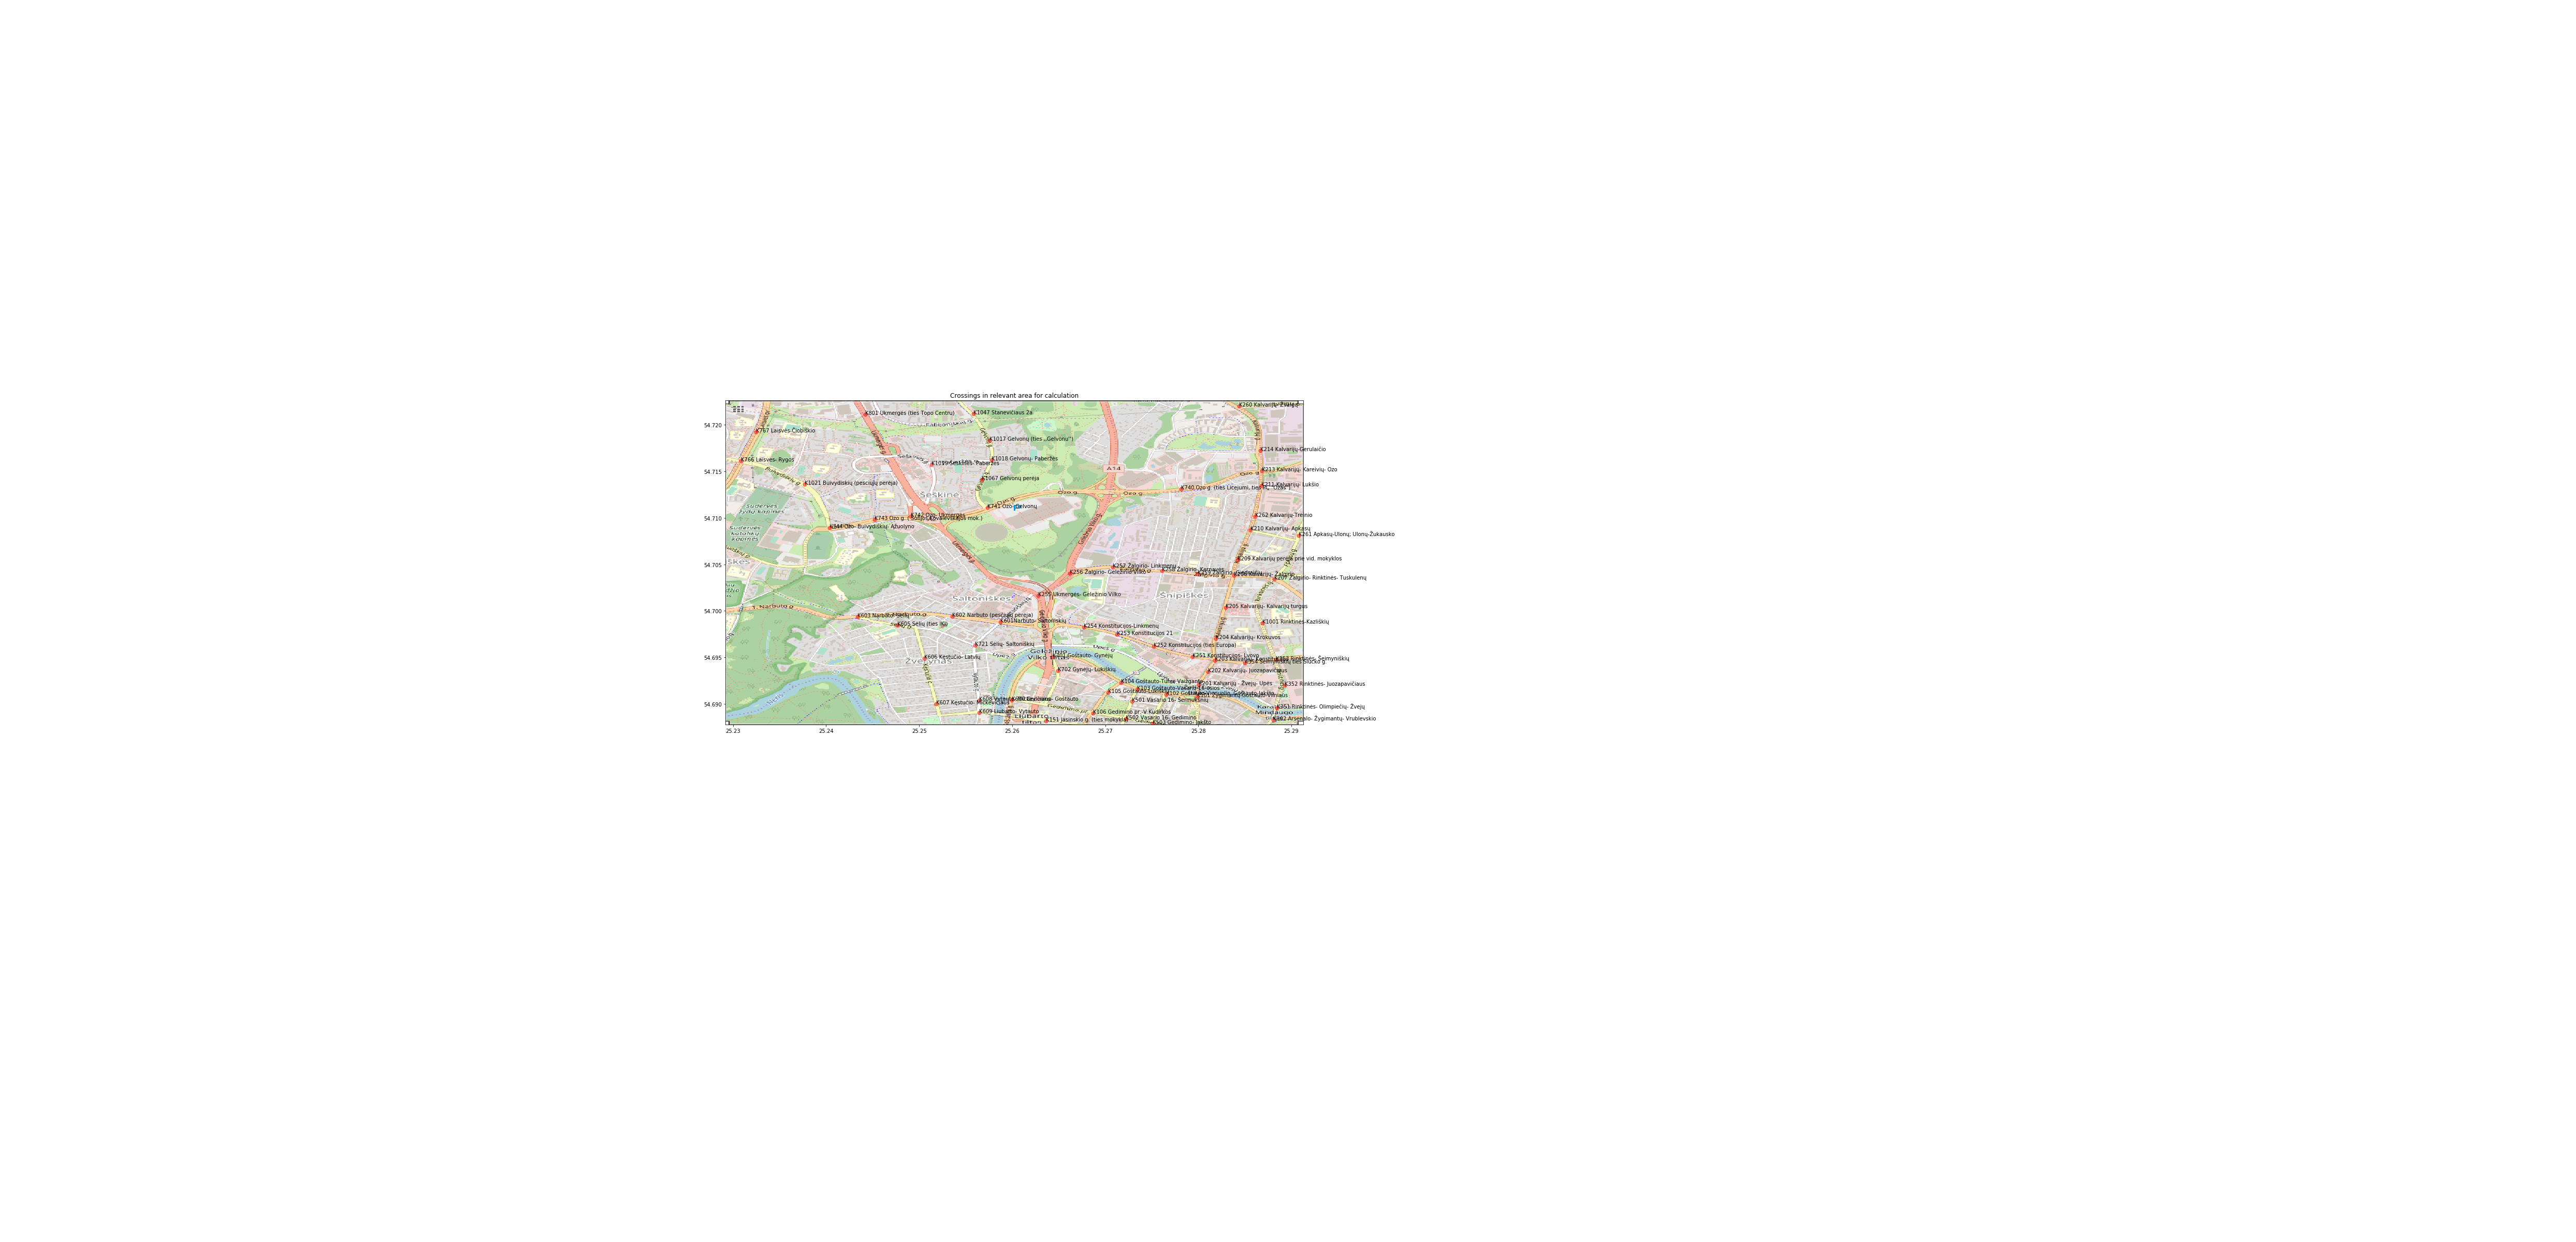

In [5]:
# Plotting coordinates of crossings on relevant map
fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(crossings_data.x, crossings_data.y, zorder=1, alpha= 0.5, c='red', s=50)

# Adding data labels to be able to see which crosings are relevant to the route
for i, txt in enumerate(crossings_data.Node):
    ax.annotate(txt, (crossings_data.x[i], crossings_data.y[i]))

ax.set_title('Crossings in relevant area for calculation')
ax.set_xlim(map_limits[0],map_limits[1])
ax.set_ylim(map_limits[2],map_limits[3])

ax.imshow(area_map, zorder=0, extent = map_limits, aspect= 'equal')

From the map I was able to identify that the following crossings are relevant to the scope:
- K702
- K255
- K256
- K257

#After going through the schemas of crossings identified that the following detectors are relevant:
- 702_D2
- 255_D4
- 256_D6
- 257_D1

In [6]:
# Delete crossings data, no longer used:
import gc
del crossings_data['Node']
del crossings_data['x']
del crossings_data['y']
gc.collect()
crossings_data=pd.DataFrame({'A':[]})

In [7]:
# Importin relevant packages for data load from detectors
import os
import glob

In [8]:
# Loading all data from 2018 folder, combining all of the CSV files into one pandas dataframe
os.chdir("C:/Users/BC1582/Desktop/MLM_trainings/traffic-master/2018")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

combined_csv = pd.concat([pd.read_csv(f, sep=';') for f in all_filenames])

print(combined_csv.head())

           Name                 Time   vol_orig  occ_orig  spd_orig  \
0  ig11FD101_D1  01.02.2018 01:00:00  35.000000     0.150       0.0   
1  ig11FD101_D1  01.02.2018 02:00:00  17.988890     0.100       0.0   
2  ig11FD101_D1  01.02.2018 03:00:00  11.011111     0.025       0.0   
3  ig11FD101_D1  01.02.2018 04:00:00  10.000000     0.025       0.0   
4  ig11FD101_D1  01.02.2018 05:00:00  10.000000     0.025       0.0   

    vol_proc  occ_proc  spd_proc  
0  35.000000     0.150      44.0  
1  17.988890     0.100      44.0  
2  11.011111     0.025      44.0  
3  10.000000     0.025      44.0  
4  10.000000     0.025      44.0  


In [9]:
# Fixing the name of detectors in order to find relevant ones.
# For simplicity, will use only Name, Time and vol_orig in estimation
df = combined_csv[['Name','Time','vol_orig']]
df.head()

,Name,Time,vol_orig
0,ig11FD101_D1,01.02.2018 01:00:00,35.000000
1,ig11FD101_D1,01.02.2018 02:00:00,17.988890
2,ig11FD101_D1,01.02.2018 03:00:00,11.011111
3,ig11FD101_D1,01.02.2018 04:00:00,10.000000
4,ig11FD101_D1,01.02.2018 05:00:00,10.000000


In [14]:
# Fixing the naming
df['Link'] = df.apply(lambda row: row.Name[6:], axis = 1)

C:\ProgramData\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
df

,Name,Time,vol_orig,link,Link
0,ig11FD101_D1,01.02.2018 01:00:00,35.000000,101_D1,101_D1
1,ig11FD101_D1,01.02.2018 02:00:00,17.988890,101_D1,101_D1
2,ig11FD101_D1,01.02.2018 03:00:00,11.011111,101_D1,101_D1
3,ig11FD101_D1,01.02.2018 04:00:00,10.000000,101_D1,101_D1
4,ig11FD101_D1,01.02.2018 05:00:00,10.000000,101_D1,101_D1
5,ig11FD101_D1,01.02.2018 06:00:00,34.966667,101_D1,101_D1
6,ig11FD101_D1,01.02.2018 07:00:00,120.988890,101_D1,101_D1
7,ig11FD101_D1,01.02.2018 08:00:00,406.922200,101_D1,101_D1
8,ig11FD101_D1,01.02.2018 09:00:00,443.033330,101_D1,101_D1
9,ig11FD101_D1,01.02.2018 10:00:00,316.000000,101_D1,101_D1


In [17]:
# And now filtering only relevant crossings for this single case. Not the best practise to hardcode but for simplicity
# let's keep only data from the 4 relevant crossings
crossings = ['702_D2','255_D4','256_D6','257_D1']
# Finally filter data that is only for relevant crossings:
filtered_df = df[df.Link.isin(crossings)]
filtered_df.shape

(2688, 5)

In [18]:
filtered_df.head()

,Name,Time,vol_orig,link,Link
14904,ig11FD255_D4,01.02.2018 01:00:00,122.077774,255_D4,255_D4
14905,ig11FD255_D4,01.02.2018 02:00:00,55.000000,255_D4,255_D4
14906,ig11FD255_D4,01.02.2018 03:00:00,42.988888,255_D4,255_D4
14907,ig11FD255_D4,01.02.2018 04:00:00,43.000000,255_D4,255_D4
14908,ig11FD255_D4,01.02.2018 05:00:00,63.000000,255_D4,255_D4


In [26]:
filtered_df['Time'] = pd.to_datetime(filtered_df['Time'])
print(filtered_df.date_str.dtype)

C:\ProgramData\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


AttributeError: 'DataFrame' object has no attribute 'date_str'

In [27]:
filtered_df.head()

,Name,Time,vol_orig,link,Link
14904,ig11FD255_D4,2018-01-02 01:00:00,122.077774,255_D4,255_D4
14905,ig11FD255_D4,2018-01-02 02:00:00,55.000000,255_D4,255_D4
14906,ig11FD255_D4,2018-01-02 03:00:00,42.988888,255_D4,255_D4
14907,ig11FD255_D4,2018-01-02 04:00:00,43.000000,255_D4,255_D4
14908,ig11FD255_D4,2018-01-02 05:00:00,63.000000,255_D4,255_D4


In [47]:
filtered_df['hour'] = filtered_df['Time'].dt.hour

C:\ProgramData\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
filtered_df.head()

,Name,Time,vol_orig,link,Link,Time2,Times,hour
14904,ig11FD255_D4,2018-01-02 01:00:00,122.077774,255_D4,255_D4,2018-01-02 01:00:00,NaT,1
14905,ig11FD255_D4,2018-01-02 02:00:00,55.000000,255_D4,255_D4,2018-01-02 02:00:00,NaT,2
14906,ig11FD255_D4,2018-01-02 03:00:00,42.988888,255_D4,255_D4,2018-01-02 03:00:00,NaT,3
14907,ig11FD255_D4,2018-01-02 04:00:00,43.000000,255_D4,255_D4,2018-01-02 04:00:00,NaT,4
14908,ig11FD255_D4,2018-01-02 05:00:00,63.000000,255_D4,255_D4,2018-01-02 05:00:00,NaT,5


hour
0     12710.332163
1      8929.686111
2      5533.677797
3      4162.055554
4      3403.244428
5      3644.577794
6      6529.777790
7     17920.055525
8     33265.422627
9     37317.048350
10    42253.193923
11    43986.833145
12    48096.800150
13    51637.433520
14    52353.484152
15    50862.958504
16    51153.172736
17    51825.552069
18    46246.611840
19    44308.577449
20    41694.766342
21    33234.481548
22    24544.067017
23    16734.115960
Name: vol_orig, dtype: float64


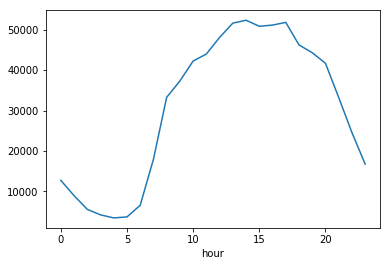

In [61]:
result = filtered_df.groupby(['hour'])['vol_orig'].agg('sum')
print(result)
result = filtered_df.groupby(['hour'])['vol_orig'].agg('sum').plot()

In [58]:
# Result: increasing trend of amount of cars passing sing 5 in the morning
# till around 14h when the peak is reached, then solid decline after 20h

AxesSubplot(0.125,0.125;0.775x0.755)
